In [44]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot  as plt
import matplotlib
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
matplotlib.rc('font', **font)
from easymore.easymore import easymore
import contextily as ctx
from shapely.geometry import Polygon
import glob
from fpdf import FPDF
from PIL import Image
import PIL
from PyPDF2 import PdfFileMerger
import os
import matplotlib as mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read the shapefile

In [45]:
cats_2   = gpd.read_file('/Volumes/F:/hydrography/test/hydrolake_sub100km_final_corrected_basins_2000000.shp')
cats_2 ['lat'] = cats_2.centroid.y
cats_2 ['lon'] = cats_2.centroid.x

cats_3   = gpd.read_file('/Volumes/F:/hydrography/test/hydrolake_sub100km_final_corrected_basins_3000000.shp')
cats_3 ['lat'] = cats_3.centroid.y
cats_3 ['lon'] = cats_3.centroid.x

rivers = gpd.read_file('/Volumes/F:/hydrography/HDMA/processed/hdma_global_stream.shp')

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_81555/1342519804.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cats_2 ['lat'] = cats_2.centroid.y
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_81555/1342519804.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cats_2 ['lon'] = cats_2.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_81555/1342519804.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cats_3 ['lat'] = cats_3.centroid.y
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_81555/1342519804.py:7: UserWa

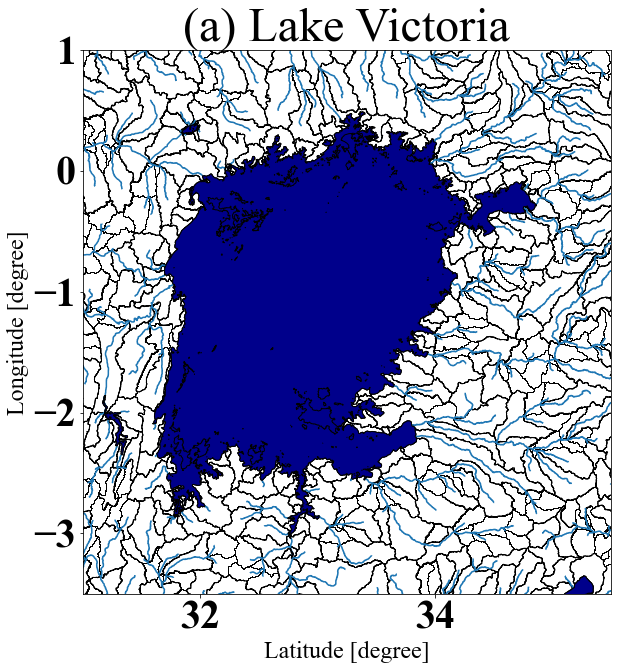

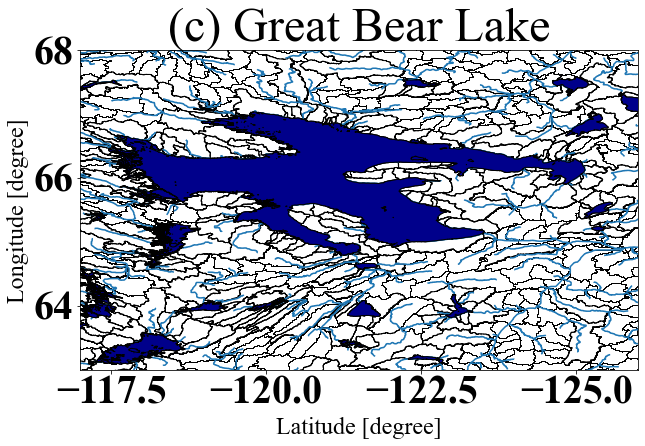

In [46]:

###################
###################
###################

# Lake Victoria
victoria  = cats_2
victoria  = victoria [victoria ['lon'] < 40]
victoria  = victoria [victoria ['lon'] > 25]
victoria  = victoria [victoria ['lat'] > -10]
victoria  = victoria [victoria ['lat'] < 4.]
victoria_lake = victoria [victoria ['lake'] == 1]


#plotting the lake victoria, lake great bear areas
fig, ax = plt.subplots(figsize=(10,10))

# 
ax.set_aspect('equal', 'box')

# 
ax.set_facecolor('white')
fig.patch.set_facecolor('white')


victoria.geometry.boundary.plot(facecolor='white',edgecolor='k',linewidth = 1, ax = ax, zorder = 1)
victoria_lake.geometry.boundary.plot(facecolor='darkblue',edgecolor='k',linewidth = 1, ax = ax, zorder = 3)
rivers.plot(zorder = 2, ax = ax)

ax.set_xlim([31,35.5])
ax.set_ylim([-3.5,1])

ax.set_title('(a) Lake Victoria')
ax.set_xlabel('Latitude [degree]', fontsize = 24)
ax.set_ylabel('Longitude [degree]', fontsize = 24)

# # add basemap
# ctx.add_basemap(ax=ax,
#                 crs=victoria.crs,
#                 zoom=9,
#                 alpha = 0.9) # source=ctx.providers.Stamen.TonerLite

plt.savefig('../frame/Lake_Victoria.png', dpi=300)

###################
###################
###################


# Great Bear Lake
great_bear  = cats_3
great_bear  = great_bear [great_bear ['lon'] < -100]
great_bear  = great_bear [great_bear ['lon'] > -140]
great_bear  = great_bear [great_bear ['lat'] > 50]
great_bear  = great_bear [great_bear ['lat'] < 80]
great_bear_lake = great_bear [great_bear ['lake'] == 1]


#plotting the lake victoria, lake great bear areas
fig, ax = plt.subplots(figsize=(10,10))

# 
ax.set_aspect('equal', 'box')

# 
ax.set_facecolor('white')
fig.patch.set_facecolor('white')


great_bear.geometry.boundary.plot(facecolor='white',edgecolor='k',linewidth = 1, ax = ax, zorder = 1)
great_bear_lake.geometry.boundary.plot(facecolor='darkblue',edgecolor='k',linewidth = 1, ax = ax, zorder = 3)
rivers.plot(zorder = 2, ax = ax)

ax.set_xlim([-117,-126])
# ax.set_ylim([64.5,67.5])
ax.set_ylim([63,68])

ax.set_title('(c) Great Bear Lake')
ax.set_xlabel('Latitude [degree]', fontsize = 24)
ax.set_ylabel('Longitude [degree]', fontsize = 24)

# # add basemap
# ctx.add_basemap(ax=ax,
#                 crs=great_bear.crs,
#                 zoom=8,
#                 alpha = 0.4,
#                 source=ctx.providers.Stamen.TonerLite) # source=ctx.providers.Stamen.TonerLite


plt.savefig('../frame/Great_Bear_Lake.png', dpi=300)




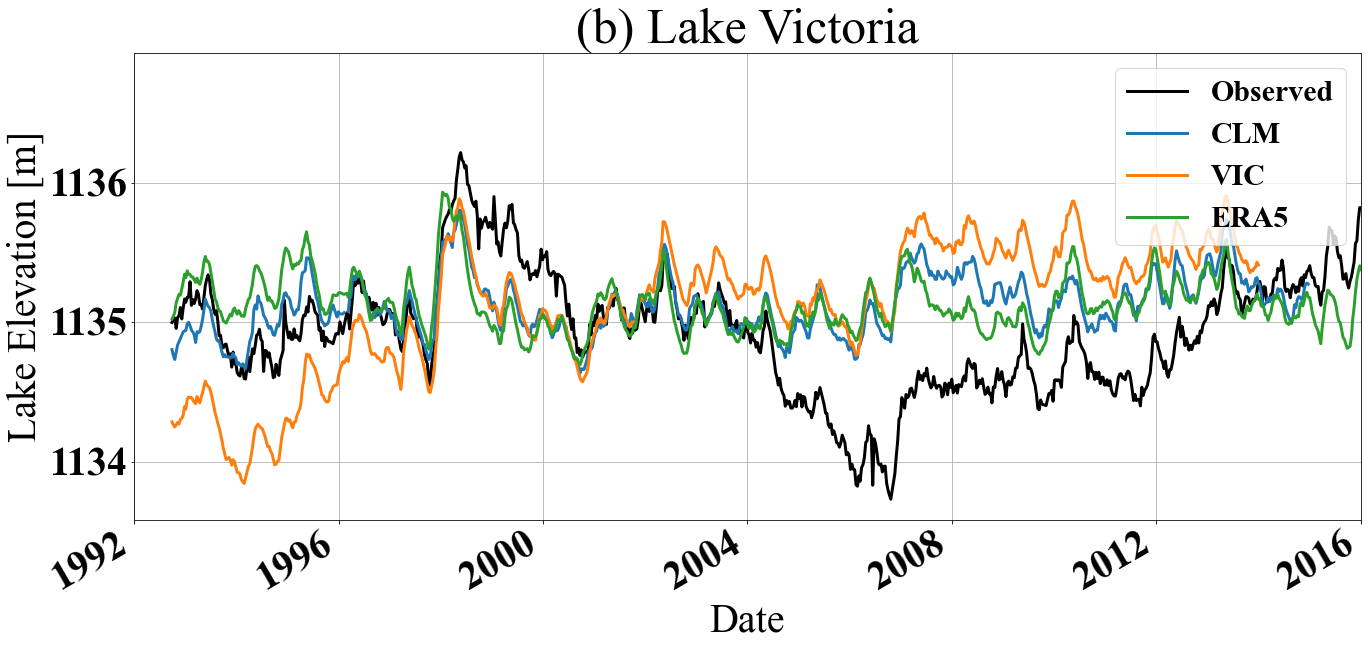

In [54]:
# read the merged simulation of the lakes for lake difenbaker and great bear lakes

lake_info     = '../data/DAHITI_Data/Lake_Victoria.csv'
CLM_sim_info  = '../data/simulations/victoria_HDMA_CLM_volume_lake.nc'
VIC_sim_info  = '../data/simulations/victoria_HDMA_VIC_volume_lake.nc'
ERA5_sim_info = '../data/simulations/victoria_HDMA_ERA5_volume_lake.nc'
file_to_save  = '../frame/Lake_Victoria_time_series.png'
lake_area     = 68800 * 1000000 # km2 to m2

# dataindex
dateindex = pd.date_range('1850-01-01',
                          '2022-12-31',
                          freq= 'D')

## load the information on elevation for lake victoria
lake_ele = pd.read_csv(lake_info)
lake_ele['date'] = pd.to_datetime(lake_ele['date'])
lake_ele = lake_ele.set_index('date')


## CLM
CLM = xr.open_dataset(CLM_sim_info)
CLM = CLM.to_dataframe()
CLM = CLM.droplevel(-1, axis="index") # remove the seg index
CLM.to_csv('test.csv')
CLM = pd.read_csv('test.csv')
os.remove('test.csv')
CLM ['Date'] = pd.to_datetime(CLM ['time'])
CLM = CLM.set_index(['Date'])
CLM = CLM.reindex(dateindex)
temp = CLM.reindex(lake_ele.index)
lake_ele['CLM_v'] = temp['volume']


## VIC
VIC = xr.open_dataset(VIC_sim_info)
VIC = VIC.to_dataframe()
VIC = VIC.droplevel(-1, axis="index") # remove the seg index
VIC.to_csv('test.csv')
VIC = pd.read_csv('test.csv')
os.remove('test.csv')
VIC ['Date'] = pd.to_datetime(VIC ['time'])
VIC = VIC.set_index(['Date'])
VIC = VIC.reindex(dateindex)
temp = VIC.reindex(lake_ele.index)
lake_ele['VIC_v'] = temp['volume']


## ERA5
ERA5 = xr.open_dataset(ERA5_sim_info)
ERA5 = ERA5.to_dataframe()
ERA5 = ERA5.droplevel(-1, axis="index") # remove the seg index
ERA5.to_csv('test.csv')
ERA5 = pd.read_csv('test.csv')
os.remove('test.csv')
ERA5 ['Date'] = pd.to_datetime(ERA5 ['time'])
ERA5 = ERA5.set_index(['Date'])
ERA5 = ERA5.reindex(dateindex)
temp = ERA5.reindex(lake_ele.index)
lake_ele['ERA5_v'] = temp['volume']


# from volume to elevation for model simulation
#
lake_ele['CLM_e'] = (lake_ele['CLM_v']/lake_area)
lake_ele['CLM_e'] = lake_ele['CLM_e']-lake_ele['CLM_e'].mean()+lake_ele['water_level'].mean()
#
lake_ele['VIC_e'] = (lake_ele['VIC_v']/lake_area)
lake_ele['VIC_e'] = lake_ele['VIC_e']-lake_ele['VIC_e'].mean()+lake_ele['water_level'].mean()
#
lake_ele['ERA5_e'] = (lake_ele['ERA5_v']/lake_area)
lake_ele['ERA5_e'] = lake_ele['ERA5_e']-lake_ele['ERA5_e'].mean()+lake_ele['water_level'].mean()


# making figures
fig, ax1 = plt.subplots(figsize = (20,10))

ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

lake_ele['water_level'].plot(ax=ax1,style='-k',label='Observed',linewidth=3)
lake_ele['CLM_e'].plot(ax=ax1,label='CLM',linewidth=3)
lake_ele['VIC_e'].plot(ax=ax1,label='VIC',linewidth=3)
lake_ele['ERA5_e'].plot(ax=ax1,label='ERA5',linewidth=3)

#
ax1.set_xlabel('Date')
ax1.set_ylabel('Lake Elevation [m]')
plt.title('(b) Lake Victoria', fontsize = 50)
ax1.legend(loc='upper right', fontsize = 30)
plt.xlim('1992-01-01','2016-01-01')
plt.tight_layout()
plt.grid()
plt.savefig(file_to_save, dpi=300)


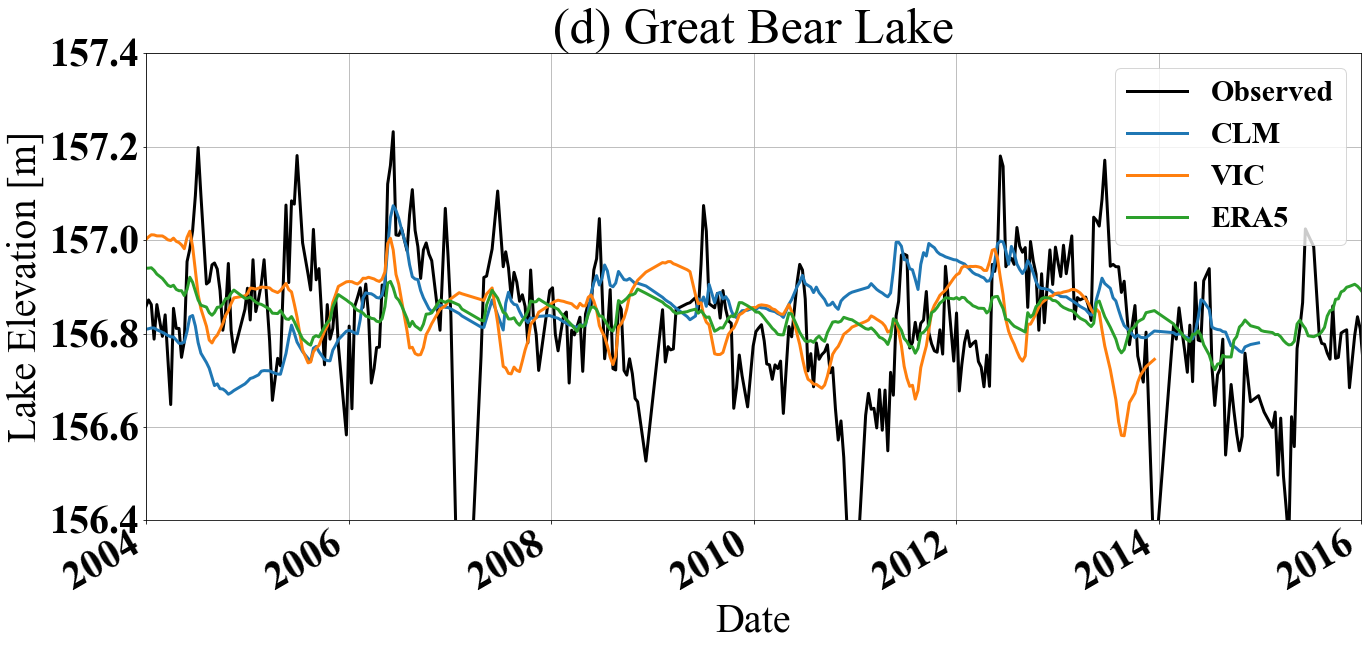

In [55]:
# read the merged simulation of the lakes for lake difenbaker and great bear lakes

lake_info     = '../data/DAHITI_Data/Great_Bear_Lake.csv'
CLM_sim_info  = '../data/simulations/great_bear_HDMA_CLM_volume_lake.nc'
VIC_sim_info  = '../data/simulations/great_bear_HDMA_VIC_volume_lake.nc'
ERA5_sim_info = '../data/simulations/great_bear_HDMA_ERA5_volume_lake.nc'
file_to_save  = '../frame/Great_Bear_Lake_time_series.png'
lake_area     = 31153 * 1000000 # km2 to m2

# dataindex
dateindex = pd.date_range('1850-01-01',
                          '2022-12-31',
                          freq= 'D')

## load the information on elevation for lake victoria
lake_ele = pd.read_csv(lake_info)
lake_ele['date'] = pd.to_datetime(lake_ele['date'])
lake_ele = lake_ele.set_index('date')


## CLM
CLM = xr.open_dataset(CLM_sim_info)
CLM = CLM.to_dataframe()
CLM = CLM.droplevel(-1, axis="index") # remove the seg index
CLM.to_csv('test.csv')
CLM = pd.read_csv('test.csv')
os.remove('test.csv')
CLM ['Date'] = pd.to_datetime(CLM ['time'])
CLM = CLM.set_index(['Date'])
CLM = CLM.reindex(dateindex)
temp = CLM.reindex(lake_ele.index)
lake_ele['CLM_v'] = temp['volume']


## VIC
VIC = xr.open_dataset(VIC_sim_info)
VIC = VIC.to_dataframe()
VIC = VIC.droplevel(-1, axis="index") # remove the seg index
VIC.to_csv('test.csv')
VIC = pd.read_csv('test.csv')
os.remove('test.csv')
VIC ['Date'] = pd.to_datetime(VIC ['time'])
VIC = VIC.set_index(['Date'])
VIC = VIC.reindex(dateindex)
temp = VIC.reindex(lake_ele.index)
lake_ele['VIC_v'] = temp['volume']


## ERA5
ERA5 = xr.open_dataset(ERA5_sim_info)
ERA5 = ERA5.to_dataframe()
ERA5 = ERA5.droplevel(-1, axis="index") # remove the seg index
ERA5.to_csv('test.csv')
ERA5 = pd.read_csv('test.csv')
os.remove('test.csv')
ERA5 ['Date'] = pd.to_datetime(ERA5 ['time'])
ERA5 = ERA5.set_index(['Date'])
ERA5 = ERA5.reindex(dateindex)
temp = ERA5.reindex(lake_ele.index)
lake_ele['ERA5_v'] = temp['volume']


# from volume to elevation for model simulation
#
lake_ele['CLM_e'] = (lake_ele['CLM_v']/lake_area)
lake_ele['CLM_e'] = lake_ele['CLM_e']-lake_ele['CLM_e'].mean()+lake_ele['water_level'].mean()
#
lake_ele['VIC_e'] = (lake_ele['VIC_v']/lake_area)
lake_ele['VIC_e'] = lake_ele['VIC_e']-lake_ele['VIC_e'].mean()+lake_ele['water_level'].mean()
#
lake_ele['ERA5_e'] = (lake_ele['ERA5_v']/lake_area)
lake_ele['ERA5_e'] = lake_ele['ERA5_e']-lake_ele['ERA5_e'].mean()+lake_ele['water_level'].mean()


# making figures
fig, ax1 = plt.subplots(figsize = (20,10))

ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

lake_ele['water_level'].plot(ax=ax1,style='-k',label='Observed',linewidth=3)
lake_ele['CLM_e'].plot(ax=ax1,label='CLM',linewidth=3)
lake_ele['VIC_e'].plot(ax=ax1,label='VIC',linewidth=3)
lake_ele['ERA5_e'].plot(ax=ax1,label='ERA5',linewidth=3)

#
ax1.set_xlabel('Date')
ax1.set_ylabel('Lake Elevation [m]')
plt.title('(d) Great Bear Lake', fontsize = 50)
ax1.legend(loc='upper right', fontsize = 30)
plt.xlim('2004-01-01','2016-01-01')
plt.ylim([156.4,157.4])
plt.tight_layout()
plt.grid()
plt.savefig(file_to_save, dpi=300)


# merging the images

In [56]:
###################
###################
###################


# merge the figures into a combined figure vertically
image_list = ['../frame/Lake_Victoria.png','../frame/Great_Bear_Lake.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset))
        y_offset += im.size[1]
    new_im.save('../frame/lakes_merged.png')
    
    
# merge the figures into a combined figure vertically
image_list = ['../frame/Lake_Victoria_time_series.png','../frame/Great_Bear_Lake_time_series.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset))
        y_offset += im.size[1]
    new_im.save('../frame/lakes_merged_time_series.png')
    
    
# merge the figures into a combined figure horizontally
image_list = ['../frame/lakes_merged.png','../frame/lakes_merged_time_series.png']
if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    new_im.save('../frame/Figure_3.png')
    